Tony Smoragiewicz

In [1]:
# import libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Problem #1
The average of the stand. dev. of noise in the images is equal to the sigma we originally set when adding noise. In addition, the maximum stand. dev. of the noise is twice the sigma. These are both reduced by a factor of the width of the box filter after we complete the smoothing. This shows that a box filter is a valid way of reducing random noise during image processing.

In [2]:
# Create 10 images with grayscale value 128
num = 10
rowcol = 256
images = 128*np.ones([rowcol,rowcol,num])

# Add noise to the images
sigma = 5
mean = 0
noise = sigma*np.random.randn(rowcol,rowcol,num) + mean
images = images+noise

# Signal to noise ratio
avg_image = np.mean(images,axis=2)
avg_images = np.repeat(avg_image[:, :, np.newaxis], num, axis=2)

EST_NOISE = np.sqrt( 1/(num-1)*np.sum( (avg_images-images)**2, axis=2) )
avg_EST_NOISE = np.mean(EST_NOISE)
max_EST_NOISE = np.amax(EST_NOISE)

print('Original')
print('The average noise is:', np.round(avg_EST_NOISE,3))
print('The max noise is:', np.round(max_EST_NOISE,3))
print('The max-to-avg noise is:', np.round(max_EST_NOISE/avg_EST_NOISE,3))

# Smooth images with 3x3 box filter
width = 3
images_smoothed = cv.blur(images, (width, width))
avg_image_smoothed = np.mean(images_smoothed,axis=2)
avg_images_smoothed = np.repeat(avg_image_smoothed[:, :, np.newaxis], num, axis=2)

EST_NOISE_smoothed = np.sqrt( 1/(num-1)*np.sum( (avg_images_smoothed-images_smoothed)**2, axis=2) )
avg_EST_NOISE_smoothed = np.mean(EST_NOISE_smoothed)
max_EST_NOISE_smoothed = np.amax(EST_NOISE_smoothed)

print('Smoothed')
print('The average noise is:', np.round(avg_EST_NOISE_smoothed,3))
print('The max noise is:', np.round(max_EST_NOISE_smoothed,3))
print('The max-to-avg noise is:', np.round(max_EST_NOISE/avg_EST_NOISE,3))

Original
The average noise is: 4.867
The max noise is: 10.433
The max-to-avg noise is: 2.144
Smoothed
The average noise is: 1.631
The max noise is: 3.681
The max-to-avg noise is: 2.144


#Problem #2
Two 1D guassian filters were calculated by taking the squareroot of the diagonals of a 2D gaussian filter. A width of 5 and 7 were used because these correspond to 2 and 3 sigma which is ~95% and ~99% of the area of the bell curve.

In [3]:
def Gauss1D(sigma, factor):
    window = np.int(np.floor(sigma*factor))
    gauss2d = np.ones([window,window])
    offset = np.floor(window/2)
    for i in range(window):
        for j in range(window):
            gauss2d[i,j] = np.exp( -1/(2*sigma**2)*( (i-offset)**2 + (j-offset)**2 ) )
    gauss2d = gauss2d/np.sum(gauss2d)

    diag = gauss2d*np.identity(gauss2d.shape[0])
    diag = diag[diag>0]
    gauss1d = np.sqrt(diag)
    return gauss1d

gauss1d = Gauss1D(1.4,5)
print('The 1D gaussian filter with a width of 5 is:')
print(np.around(gauss1d, 3) )
print()

gauss1d = Gauss1D(1.4,7)
print('The 1D gaussian filter with a width of 7 is:') 
print(np.around(gauss1d, 3) )

The 1D gaussian filter with a width of 5 is:
[0.029 0.104 0.223 0.288 0.223 0.104 0.029]

The 1D gaussian filter with a width of 7 is:
[0.005 0.029 0.103 0.221 0.285 0.221 0.103 0.029 0.005]


#Problem #3

In [4]:
img = np.array([10.,10.,10.,10.,10.,40.,40.,40.,40.,40.])
pad = np.hstack([0.,0.,img,0.,0.])
avg_const = 1/5*np.array([1,1,1,1,1])

output = np.zeros(img.shape)
for i in range(img.size):
  output[i] = np.dot(pad[i:i+avg_const.size], avg_const)
print('Filter (a) output with zero padding:')
print(output)

avg_gauss = 1/10*np.array([1,2,4,2,1])
output = np.zeros(img.shape)
for i in range(img.size):
  output[i] = np.dot(pad[i:i+avg_gauss.size], avg_gauss)
print('Filter (b) output with zero padding:')
print(output)

Filter (a) output with zero padding:
[ 6.  8. 10. 16. 22. 28. 34. 40. 32. 24.]
Filter (b) output with zero padding:
[ 7.  9. 10. 13. 19. 31. 37. 40. 36. 28.]


In [5]:
gauss = 1/10*np.array([1,2,4,2,1])
gauss = np.vstack([np.zeros([2,5]),gauss,np.zeros([2,5])])
gauss = gauss/10

images_smoothed = cv.filter2D(images, ddepth=-1, kernel=gauss)
avg_image_smoothed = np.mean(images_smoothed,axis=2)
avg_images_smoothed = np.repeat(avg_image_smoothed[:, :, np.newaxis], num, axis=2)

EST_NOISE_smoothed = np.sqrt( 1/(num-1)*np.sum( (avg_images_smoothed-images_smoothed)**2, axis=2) )
avg_EST_NOISE_smoothed = np.mean(EST_NOISE_smoothed)
max_EST_NOISE_smoothed = np.amax(EST_NOISE_smoothed)

print('The average noise is:', np.round(avg_EST_NOISE_smoothed,3))
print('The max noise is:', np.round(max_EST_NOISE_smoothed,3))
print('The max-to-avg noise is:', np.round(max_EST_NOISE/avg_EST_NOISE,3))
print()

box = 1/5*np.array([1,1,1,1,1])
box = np.vstack([np.zeros([2,5]),box,np.zeros([2,5])])
box = box/10

images_smoothed = cv.filter2D(images, ddepth=-1, kernel=box)
avg_image_smoothed = np.mean(images_smoothed,axis=2)
avg_images_smoothed = np.repeat(avg_image_smoothed[:, :, np.newaxis], num, axis=2)

EST_NOISE_smoothed = np.sqrt( 1/(num-1)*np.sum( (avg_images_smoothed-images_smoothed)**2, axis=2) )
avg_EST_NOISE_smoothed = np.mean(EST_NOISE_smoothed)
max_EST_NOISE_smoothed = np.amax(EST_NOISE_smoothed)

print('The average noise is:', np.round(avg_EST_NOISE_smoothed,3))
print('The max noise is:', np.round(max_EST_NOISE_smoothed,3))
print('The max-to-avg noise is:', np.round(max_EST_NOISE/avg_EST_NOISE,3))

The average noise is: 0.249
The max noise is: 0.534
The max-to-avg noise is: 2.144

The average noise is: 0.219
The max noise is: 0.531
The max-to-avg noise is: 2.144


b) Filter (a) has a reduced computational cost because it's possible to use a integral image / summed area table to calculate the filter values. In addition, the box filter has reduced noise because it averages equally from all cells while filter (b) adds weights. This can lead to noisey pixels retaining some of their high noise levels at the added benefit of less blurring from neighboring cells.

#Problem #4

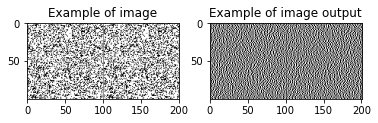

In [6]:
r = 100
c = 100
salt_pepper = 100*np.random.choice(np.arange(0, 2), r*c, p=[0.3, 0.7])
salt_pepper = np.reshape(salt_pepper, [r,c])

image = np.hstack([salt_pepper, 50*np.ones([r,1]), salt_pepper])
plt.subplot(1,2,1)
plt.title('Example of image')
plt.imshow(image, cmap='gray', vmin=0, vmax=100)

operator = np.array([-1,2,-1])
operator = np.reshape(operator,[1,3])
output = cv.filter2D(image, -1, operator)
plt.subplot(1,2,2)
plt.title('Example of image output')
plt.imshow(output, cmap='gray', vmin=-100, vmax=100)
plt.show()

line = output[:,c]

Operator is on the line

In [7]:
# Operator input possilibities
options = np.array([[0, 50, 0],
                    [0, 50, 100],
                    [100, 50, 0],
                    [100, 50, 100]])

# Operator output possibilities
output = np.sum(operator*options,axis=1)

# Probabilities
chances = np.array([0.3**2, 0.3*0.7, 0.7*0.3, 0.7**2])

print("Chances of  100 are: ", np.round(chances[0],2))
print("Chances of    0 are: ", np.round(chances[1]+chances[2],2))
print("Chances of -100 are: ", np.round(chances[3],2))

Chances of  100 are:  0.09
Chances of    0 are:  0.42
Chances of -100 are:  0.49


Operator is adjacent to the line

In [8]:
# Operator input possilibities
options = np.array([[50, 0, 0],
                    [50, 0, 100],
                    [50, 100, 0],
                    [50, 100, 100]])

# Operator output possibilities
output = np.sum(operator*options,axis=1)

# Probabilities
chances = np.array([0.3**2, 0.3*0.7, 0.7*0.3, 0.7**2])

print("Chances of -150 are: ", np.round(chances[1],2))
print("Chances of  -50 are: ", np.round(chances[0],2))
print("Chances of   50 are: ", np.round(chances[3],2))
print("Chances of  150 are: ", np.round(chances[2],2))

Chances of -150 are:  0.21
Chances of  -50 are:  0.09
Chances of   50 are:  0.49
Chances of  150 are:  0.21


#Problem #5

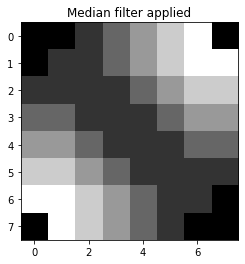

In [9]:
fxy = np.zeros([8,8])
for i in range(8):
  for j in range(8):
    fxy[i,j] = abs(i-j)

# Add zero padding
fxy = np.hstack((np.zeros([fxy.shape[0],1]), fxy, np.zeros([fxy.shape[0],1])))
fxy = np.vstack((np.zeros([1,fxy.shape[1]]), fxy, np.zeros([1,fxy.shape[1]])))
fxy = np.uint8(fxy)
fxy_med = cv.medianBlur(fxy,3)

# Remove added border pixels
fxy_med = fxy_med[1:-1,1:-1]

plt.imshow(fxy_med, cmap='gray')
plt.title('Median filter applied')
plt.show()

#Problem #6

In [10]:
img = np.array([4.,4.,4.,4.,8.,8.,8.,8.])
pad = np.hstack([0.,img,0.])
avg_const = 1/5*np.array([1,1,1])

pad = np.uint8(pad)
output = cv.medianBlur(pad,3)
output = np.transpose(output[1:-1])
print('Median filter w/zero padding')
print(output)

avg_gauss = 1/4*np.array([1,2,1])
output = np.zeros(img.shape)
for i in range(img.size):
  output[i] = np.dot(pad[i:i+avg_gauss.size], avg_gauss)
print('Averaging mask w/zero padding')
print(output)

Median filter w/zero padding
[[4 4 4 4 8 8 8 8]]
Averaging mask w/zero padding
[3. 4. 4. 5. 7. 8. 8. 6.]


#Problem #7

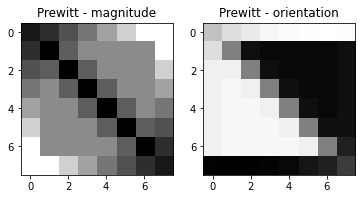

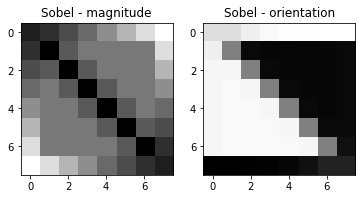

In [11]:
fxy = np.zeros([8,8])
for i in range(8):
  for j in range(8):
    fxy[i,j] = abs(i-j)

# Add zero padding
fxy = np.hstack((np.zeros([fxy.shape[0],1]), fxy, np.zeros([fxy.shape[0],1])))
fxy = np.vstack((np.zeros([1,fxy.shape[1]]), fxy, np.zeros([1,fxy.shape[1]])))


Prewittx = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
Prewitty = np.array([[-1,-1,-1],
                    [0,0,0],
                    [1,1,1]])
Px = cv.filter2D(fxy,-1,Prewittx)
Py = cv.filter2D(fxy,-1,Prewitty)

# Remove added border pixels
Px = Px[1:-1,1:-1]
Py = Py[1:-1,1:-1]

mag = np.sqrt(Px**2+Py**2)
theta = np.arctan(Py,Px)

plt.subplot(1,2,1)
plt.title('Prewitt - magnitude')
plt.imshow(mag, cmap='gray')
plt.subplot(1,2,2)
plt.title('Prewitt - orientation')
plt.imshow(theta, cmap='gray')
plt.show()

Sx = cv.Sobel(fxy,cv.CV_64F,1,0,ksize=3)
Sy = cv.Sobel(fxy,cv.CV_64F,0,1,ksize=3)

# Remove added border pixels
Sx = Sx[1:-1,1:-1]
Sy = Sy[1:-1,1:-1]

mag = np.sqrt(Sx**2+Sy**2)
theta = np.arctan(Sy,Sx)


plt.subplot(1,2,1)
plt.title('Sobel - magnitude')
plt.imshow(mag, cmap='gray')
plt.subplot(1,2,2)
plt.title('Sobel - orientation')
plt.imshow(theta, cmap='gray')
plt.show()

#Problem #8
Compute the C matrix and find its eigenvalues, to detect the corner in the image given in Figure 1,
when using a neighborhood of 7 × 7.

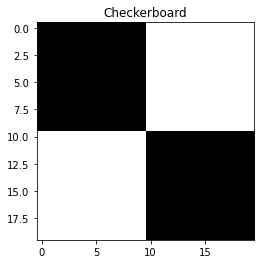

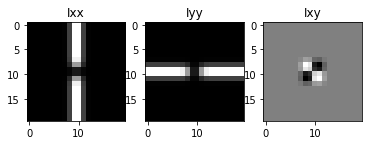

In [14]:
image = np.hstack([np.zeros([10,10]), 40*np.ones([10,10])])
checker = np.vstack([image, np.fliplr(image)])
plt.title('Checkerboard')
plt.imshow(checker, cmap='gray', vmin=0, vmax=40)
plt.show()

Sx = cv.Sobel(checker,cv.CV_64F,1,0,ksize=7)
Sy = cv.Sobel(checker,cv.CV_64F,0,1,ksize=7)
Sxy = Sx*Sy
R = (Sx**2 * Sy**2) - 0.05*(Sx**2 + Sy**2)**2

plt.subplot(1,3,1)
plt.title('Ixx')
plt.imshow(Sx**2, cmap='gray')

plt.subplot(1,3,2)
plt.title('Iyy')
plt.imshow(Sy**2, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(Sxy, cmap='gray')
plt.title('Ixy')
plt.show()


The C matrix is a composition of [[Ixx, Ixy]; [Ixy, Iyy]]. The eigen values are the sum of the diagonals Ixx and Iyy.